In [7]:
#refs:
#http://stackoverflow.com/questions/7718034/maximum-likelihood-estimate-pseudocode
#http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/
# Our goal: estimate the posterior of the mean \mu (assuming we know the standard deviation to be 1), 
# using N points from a normal centered around zero

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

#Generate fake data set (Gaussian centered at zero)
n_data = 500
burnin=100
np.random.seed(123) #for reproducibility
data = np.random.randn(n_data)

#Parameters for the MCMC-MH method
prop_width=0.1 #width (sigma) of proposed step from current step
chain=[0.3]     #starting value of chain
rejected=0     #track number of rejected proposals to compute rejection rate

#Build the chain
while len(chain)<1000:
    prop=norm(chain[-1],prop_width).rvs() #propose step
    
    pprop=norm(prop,1).pdf(data).prod()      #posterior for proposal
    pcurr=norm(chain[-1],1).pdf(data).prod() #current posterior
    
    acceptance=pprop/pcurr  #ratio of posteriors
    accept= np.random.rand() < acceptance #acceptance
    if accept:
        chain.append(prop) #add accepted proposal to chain
    else:
        rejected+=1
        chain.append(chain[-1]) #note: still always store a value!
    
print("rejection rate:%.2f"%(rejected/len(chain)))

rejection rate:0.53


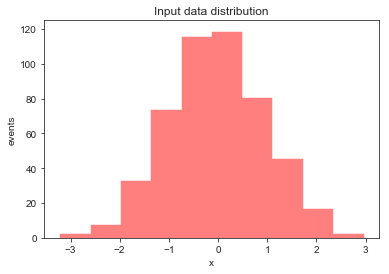

In [8]:
# Plotting results
plt.hist(data, histtype='stepfilled', facecolor='r', alpha=0.5)
plt.xlabel('x')
plt.ylabel('events')
plt.title('Input data distribution')
#xs = np.linspace(min(data), max(data), 1000)
#pdf = norm.pdf(xs, 0, 1)
#plt.plot(xs, pdf * n_data, 'k--')
plt.show()

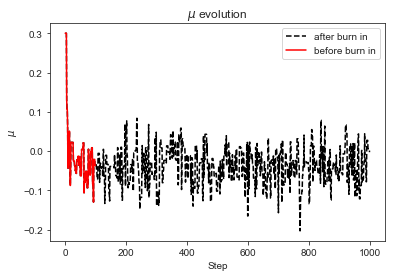

In [16]:
plt.plot(chain, 'k--', label='after burn in')
plt.plot(chain[:burnin], 'r-', label='before burn in')
plt.xlabel('Step')
plt.ylabel('$\mu$')
plt.title('$\mu$ evolution')
plt.legend()
plt.show()

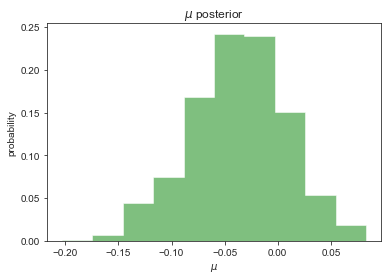

In [10]:
n, bins, patches = plt.hist(chain[burnin:], histtype='stepfilled', facecolor='g', alpha=0.5, weights=np.ones_like(chain[burnin:])/len(chain[burnin:]))
plt.xlabel('$\mu$')
plt.ylabel('probability')
plt.title('$\mu$ posterior')
plt.show()